In [2]:
import numpy as np
import os,sys

sys.path.append('../../../../RL_lib/Utils')
%load_ext autoreload
%autoreload 2
%matplotlib nbagg
import os
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/briangaudet/Study/Subjects/MachineLearning/Projects/PCM/PCM_v2/Mars_DTM


In [3]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

## dtm shape x,y where x is rows y is columns
## we want x to be downrange so intersection coords is consistent with our target centered coordinate frame
## For plotting, the y coordinate should be rows (x) and x coordinate should be columns (y)


In [4]:
from dtm_measurement_model import DTM_measurement_model
from time import time
dtm = np.load('elevations.npy')
dtm = dtm
print(dtm.shape)
print(np.min(dtm) , np.max(dtm))

(18849, 7293)
0.0 473.8090000000001


<IPython.core.display.Javascript object>


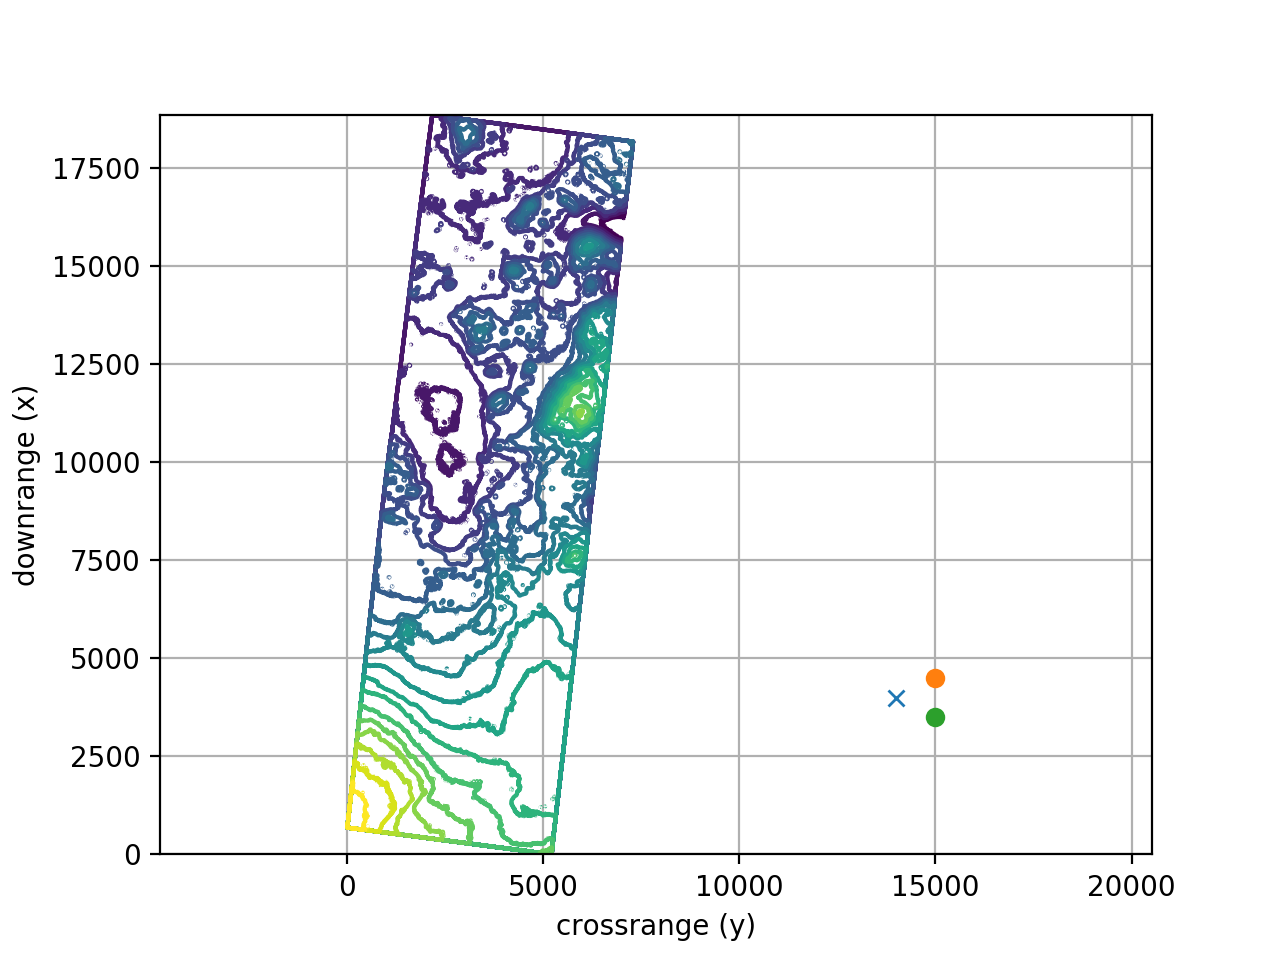

In [4]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
x = np.arange(0,dtm.shape[1],1)
y = np.arange(0,dtm.shape[0],1)
X, Y = np.meshgrid(x, y)
Z = dtm
plt.figure()
CS = plt.contour(X, Y, Z,20)

In [5]:
plt.axis('equal')
plt.grid()
plt.xlabel('crossrange (y)')
plt.ylabel('downrange (x)')
target = np.asarray([14000,4000])
p1 = target+np.asarray([1000,500])
p2 = target+np.asarray([1000,-500])


plt.plot(target[0],target[1],marker='x',markersize=6)
plt.plot(p1[0],p1[1],marker='o',markersize=6)
plt.plot(p2[0],p2[1],marker='o',markersize=6)

#rect = plt.Rectangle((target[0]-dr, target[0]), 0.4, 0.15, color='k', alpha=0.3)

In [11]:

mini_dtm = np.load('synth_elevations.npy')

<IPython.core.display.Javascript object>


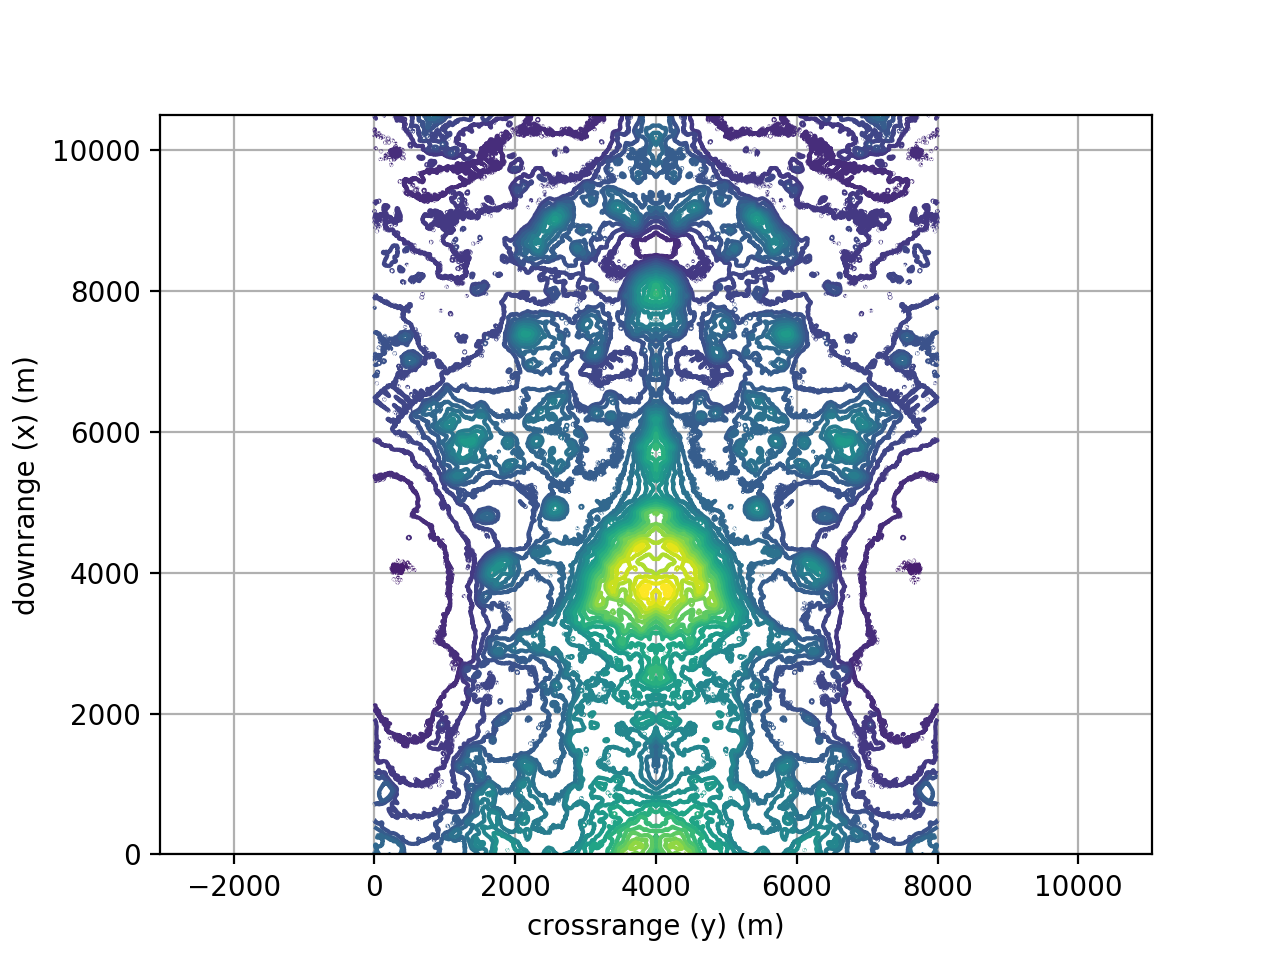

Text(0,0.5,'downrange (x) (m)')

In [30]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
x = np.arange(0,mini_dtm.shape[1],1)
y = np.arange(0,mini_dtm.shape[0],1)
X, Y = np.meshgrid(x, y)
Z = mini_dtm
plt.figure()
CS = plt.contour(X, Y, Z,30)
plt.axis('equal')
plt.grid()
plt.xlabel('crossrange (y) (m)')
plt.ylabel('downrange (x) (m)')

In [22]:
print(mini_dtm[3900,4000])
print(mini_dtm[3850,4000])
print(mini_dtm[3800,4000])
print(mini_dtm[3800,4075])
print(mini_dtm[3800,4050])
print(mini_dtm[3800,4025])
print(mini_dtm[3750,4000])
print(mini_dtm[4000,4000])
print(mini_dtm[3500,3500])
print(mini_dtm[4500,4500])
print(mini_dtm[6000,4000])

348.8900000000001
360.0240000000001
364.87300000000005
371.7600000000001
367.74300000000005
366.30100000000004
360.196
323.28
289.10000000000014
274.0500000000002
235.42000000000007


In [29]:
print(np.max(mini_dtm))
print(np.where(mini_dtm>382.81))
print(mini_dtm[3728,3844])

382.8380000000001
(array([3729, 3729]), array([3844, 4155]))
382.80000000000007


<IPython.core.display.Javascript object>


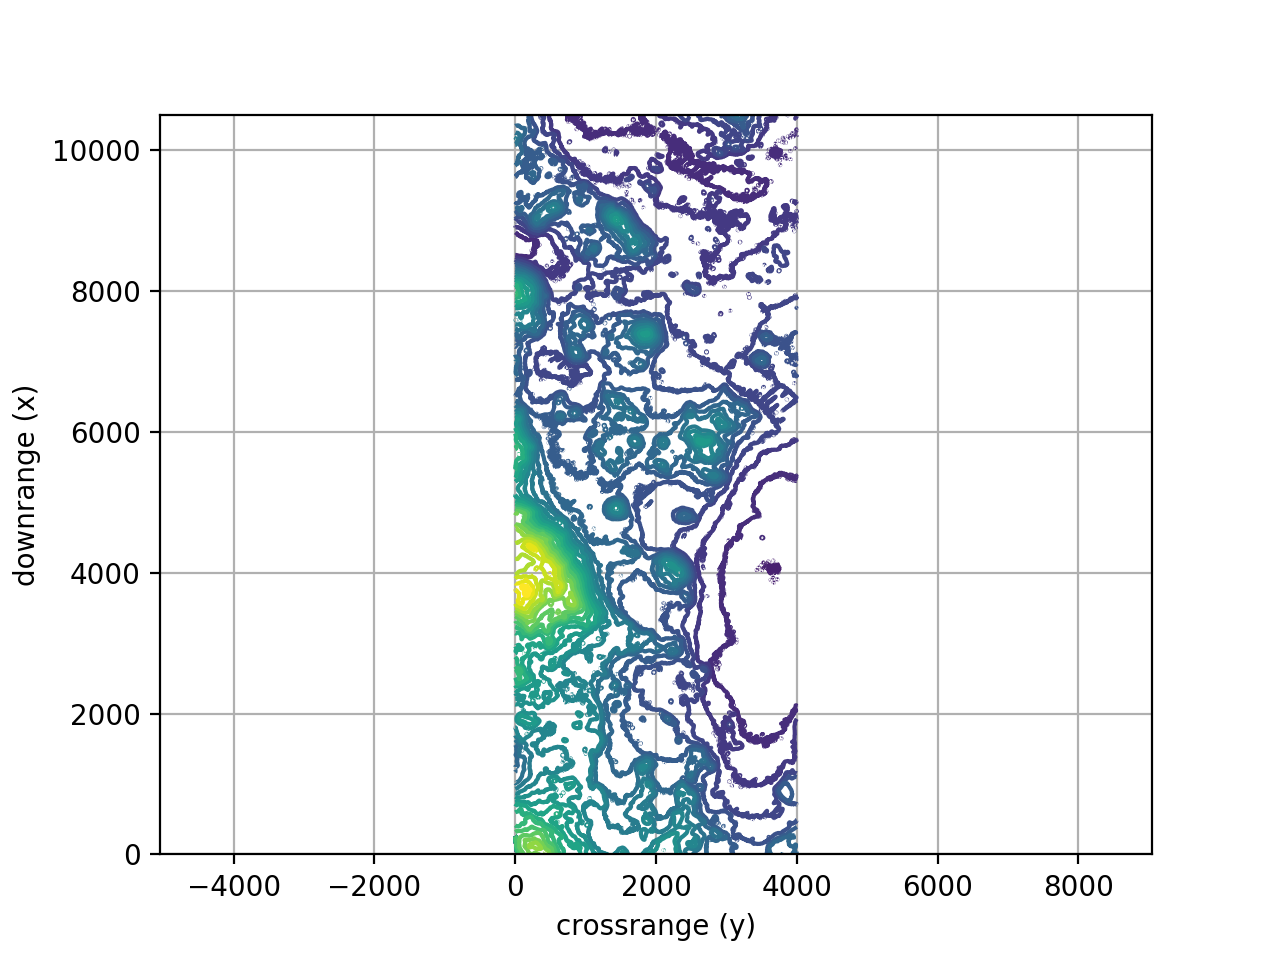

Text(0,0.5,'downrange (x)')

In [11]:
mini_dtm_lr = np.fliplr(mini_dtm)
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
x = np.arange(0,mini_dtm_lr.shape[1],1)
y = np.arange(0,mini_dtm_lr.shape[0],1)
X, Y = np.meshgrid(x, y)
Z = mini_dtm_lr
plt.figure()
CS = plt.contour(X, Y, Z,30)
plt.axis('equal')
plt.grid()
plt.xlabel('crossrange (y)')
plt.ylabel('downrange (x)')

In [12]:
sdtm = np.hstack((mini_dtm,mini_dtm_lr))


In [9]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
x = np.arange(0,sdtm.shape[1],1)
y = np.arange(0,sdtm.shape[0],1)
X, Y = np.meshgrid(x, y)
Z = sdtm
plt.figure()
CS = plt.contour(X, Y, Z,30)
plt.axis('equal')
plt.grid()
plt.xlabel('crossrange (y)')
plt.ylabel('downrange (x)')

NameError: name 'sdtm' is not defined

In [21]:
target = (4000,4000)
print(sdtm[target])
print(sdtm.shape)

323.28
(10500, 8000)


In [22]:
np.save('sdtm.npy',sdtm)

In [10]:
sdtm = np.load('sdtm.npy')
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
x = np.arange(0,sdtm.shape[1],1)
y = np.arange(0,sdtm.shape[0],1)
X, Y = np.meshgrid(x, y)
Z = sdtm
plt.figure()
CS = plt.contour(X, Y, Z,30)
plt.axis('equal')
plt.grid()
plt.xlabel('crossrange (y)')
plt.ylabel('downrange (x)')

FileNotFoundError: [Errno 2] No such file or directory: 'sdtm.npy'

In [112]:
from dtm_measurement_model import DTM_measurement_model
from time import time
dtm = np.load('elevations.npy')
print(dtm.shape)
mm = DTM_measurement_model(dtm,debug=True)

nx=dtm.shape[0]
ny=dtm.shape[1]
x = np.linspace(0,nx-1,nx)
y = np.linspace(0,ny-1,ny)
X,Y=np.meshgrid(x,y)
Z = dtm
print(X.shape,Y.shape,Z.shape)

(18849, 7293)
nref:  475
(7293, 18849) (7293, 18849) (18849, 7293)


In [13]:
print (sdtm.shape)

(10500, 8000)


In [ ]:
x = np.arange(0,)

In [102]:
from dtm_measurement_model import DTM_measurement_model
from time import time
dtm = np.load('elevations.npy')
print(dtm.shape)
mm = DTM_measurement_model(dtm,debug=True)

m = 4*300*30

var = 4
center = np.asarray([dtm.shape[0]/2,dtm.shape[1]/2,1000])
pos_bounds = np.asarray([dtm.shape[0]/var, dtm.shape[1]/var,500])
t0=time()
for i in range(m):
    pos = center + np.random.uniform(low=-pos_bounds,high=pos_bounds)
    dvec = make_dvec()
    reading, loc = mm.get_altimeter_reading(dvec,pos)
    rdvec = pos - loc
    ralt = np.linalg.norm(pos - loc)
    rdvec /= np.linalg.norm(rdvec)
    #print(dvec,pos,reading)
    #print(rdvec,loc,ralt)
print('ET: ',time()-t0)

(18849, 7293)
nref:  475
ET:  9.741400957107544


In [47]:
from time import time
dvec = 1.0*np.asarray([0,0,-1])
pos = np.asarray([7000,3000,1000])
t0=time()
reading, loc = mm.get_altimeter_reading(dvec,pos)
t1 = time()
print('et: ',t1-t0)
print(reading)
print(dtm[int(loc[0]),int(loc[1])])

et:  0.002228975296020508
848.0
151.72000000000003


In [140]:
pos

array([9000., 1500.,  992.])

In [22]:
foo = 20*np.random.rand(100)-10
if np.any(foo >= 10) or np.any(foo < 0):
    print('foo')

foo


In [23]:
np.cos(4*np.pi/5)

-0.8090169943749473

In [40]:
import attitude_utils as attu
ap = attu.Quaternion_attitude()
e1 = np.random.uniform(low=[-np.pi,-np.pi/2+np.pi/16,-np.pi],high=[np.pi,np.pi/2-np.pi/16,np.pi])
print(e1)
C = attu.Euler3212DCM(e1)
q1 = attu.DCM2EP(C)
q2 = ap.euler3212q(e1)
print(q1,q2)



[ 2.6215856  -0.72792281  2.92294818]
[ 0.31574881 -0.27634275 -0.88770874 -0.18950085] [-0.31574881  0.27634275  0.88770874  0.18950085]


In [47]:
for i in range(10000):
    e1 = np.random.uniform(low=[-np.pi,-np.pi/2+np.pi/16,-np.pi],high=[np.pi,np.pi/2-np.pi/16,np.pi])
    C = attu.Euler3212DCM(e1)
    q1 = attu.DCM2EP(C)
    q2 = ap.euler3212q(e1)
    assert q1[0] > 0

In [43]:
for i in range(10000):
    q1 = np.random.uniform(low=-1,high=1,size=4)
    q1 /= np.linalg.norm(q1)
    C = attu.EP2DCM(q1)
    e1 = attu.DCM2Euler321(C)
    e2 = ap.q2Euler321(q1)
    delta = np.linalg.norm(e1-e2)
    if delta > 1e-6:
        print(e1,e2)
    


In [44]:
for i in range(10000):
    q1 = np.random.uniform(low=-1,high=1,size=4)
    q1 /= np.linalg.norm(q1)
    q2 = -q1
    e1 = ap.q2Euler321(q1)
    e2 = ap.q2Euler321(q2)
    delta = np.linalg.norm(e1-e2)
    if delta > 1e-6:
        print(e1,e2)
        

In [83]:
bob = 100*np.random.rand(10,2)
lim = np.asarray([10,20])
foo = np.any(bob >= lim,axis=1)
print(foo)


[ True  True  True  True  True  True  True  True  True  True]


In [96]:
bob = 100*np.random.rand(10,2)
print(bob)
lim = np.asarray([10,40])
idx = np.all(bob < lim,axis=1)
print(idx)
print(bob[idx])

[[56.93647801 39.38629065]
 [12.62343411 60.70616358]
 [79.13006674 88.17707453]
 [ 5.29155567 35.88039749]
 [ 8.69369551 20.04196537]
 [96.08842764 70.30427356]
 [91.31300504  1.40609393]
 [49.93390444 93.18367898]
 [95.6773103   9.64294144]
 [ 2.3369721  25.5418935 ]]
[False False False  True  True False False False False  True]
[[ 5.29155567 35.88039749]
 [ 8.69369551 20.04196537]
 [ 2.3369721  25.5418935 ]]


In [102]:
b1 = np.asarray([True,False,False,True])
b2 = np.asarray([False,True,True,True])
print(np.bitwise_and(b1,b2))

[False False False  True]


In [5]:
for i in range(10):
    print(np.random.randint(5))

2
1
1
0
2
4
3
0
3
0


In [6]:
for i in range(5):
    print (i)

0
1
2
3
4
